In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('IRIS.csv')
raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data =  raw_data.copy()
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

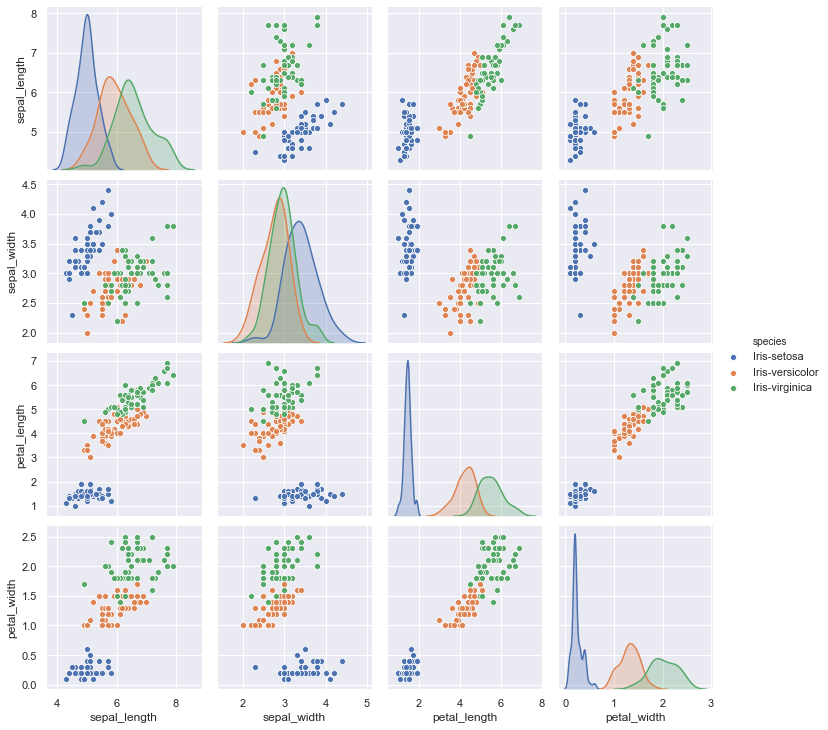

In [4]:
sns.pairplot(data , hue = 'species')

#### From the above pair plot we can see that Petal length and Petal width are the only features that can clearly seperate the three flower species

#   

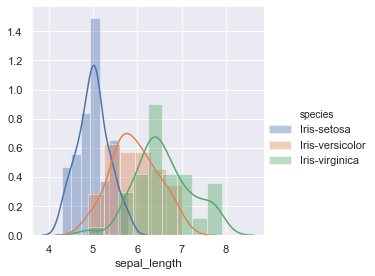

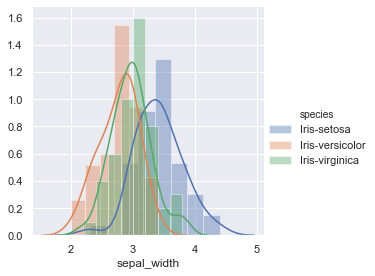

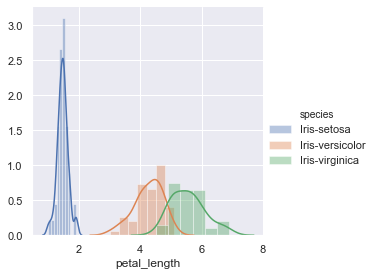

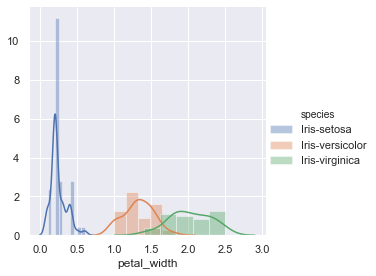

In [5]:
sns.FacetGrid(data, hue='species',height=4).map(sns.distplot,'sepal_length').add_legend()
sns.FacetGrid(data, hue='species',height=4).map(sns.distplot,'sepal_width').add_legend()

sns.FacetGrid(data, hue='species',height=4).map(sns.distplot,'petal_length').add_legend()
sns.FacetGrid(data, hue='species',height=4).map(sns.distplot,'petal_width').add_legend()

plt.show()

#### Even from the above distribution plots , we can clearly see that the three species can be easily distinguished with petal length and petal width . The Sepal Length and Sepal width somewhat overlap with each other.

#   

Text(38.17151471354167, 0.5, 'Petal Width')

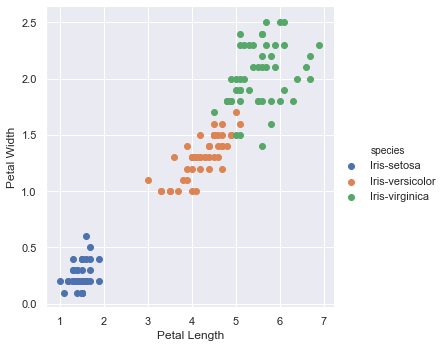

In [34]:
sns.FacetGrid(data, hue = "species", height = 5).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

In [7]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### As we can see, the correlation between petal length and petal width is relatively higher than sepal length and width.

#  

## Since this is a classification problem , we apply Logistic Regression

# Applying Logistic Regression

In [27]:
targets = data['species']
inputs = data[['petal_length','petal_width']]

### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size = 0.2 , random_state = 42)

In [30]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = reg.predict(x_test)

In [32]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### Calculating accuracy of the model

In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc*100

100.0